**Process mining** is a way to understand and learn from how things are done in a company. It involves looking at the information created while tasks are being done and figuring out the best ways to improve those tasks. The ultimate aim of process mining is to find, describe, watch over, and make better the steps in these activities.

In [7]:
# data
import pandas as pd
from .autonotebook import tqdm as notebook_tqdm


from pm4py.visualization.petri_net.util import performance_map 
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

import graphviz

ModuleNotFoundError: No module named 'pandas'

In [3]:
d = pd.read_csv("Pangea-data - stage_data.csv")

In [5]:
d.columns = ["case:concept:name", "concept:name", "time:timestamp", "org:resource", "Updated_By", "Ended_at", "Duration"]
d = dataframe_utils.convert_timestamp_columns_in_df(d)
d = d.sort_values('time:timestamp')

In [8]:
log = log_converter.apply(d)

In [11]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)


/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed variants :: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 1769.49it/s]


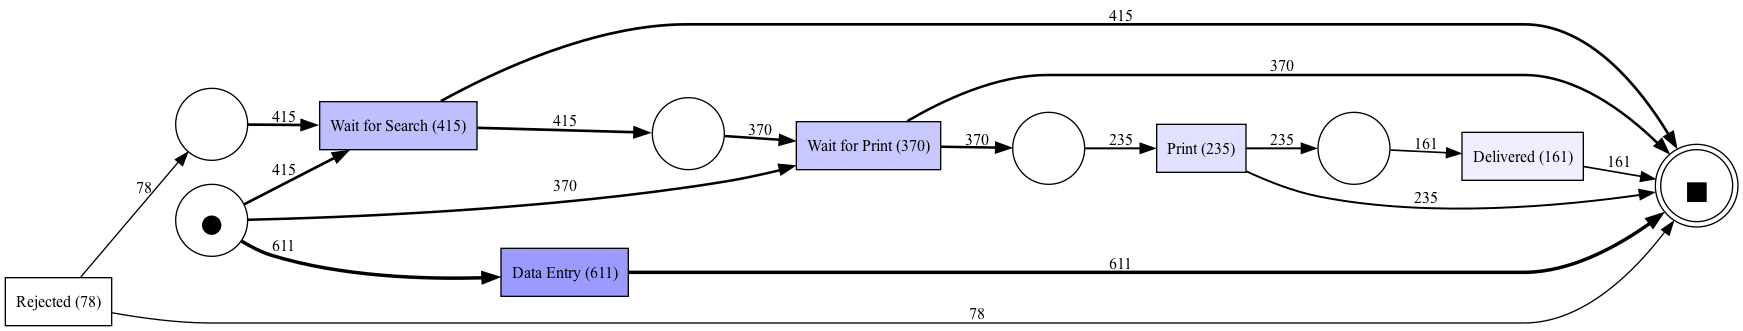

In [12]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)

In [ ]:
df = pd.read_csv('running-example.csv')

In [ ]:
# csv
df = pd.read_csv('running-example.csv')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

In [ ]:
log = log_converter.apply(df)

In [ ]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)